# Boston House Pricing

The dataset for this analysis is the Boston Housing Dataset, previously contained in the UCL Machine Learning repository. We shall import it from scikit-learn. It contains 506 samples and 13 feature variables.

Our objective is to predict the price of the houses from the features given. We shall be using the method of Linear Regression. In this analysis, only 2 models have been applied and evaluated for performance.

###### Importing required libraries

In [12]:
import numpy as np
import pandas as pd

#libraries for regression and measuring performance

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

#visualisation libraries

import matplotlib.pyplot as plt
import seaborn as sns

#to embed the graph in the notebook:
%matplotlib inline

###### Importing the dataset

In [16]:
from sklearn import datasets
boston = datasets.load_boston()

###### Data description

In [17]:
print(type(boston))
print('\n') #spacing
print(boston.keys())
print('\n')
print(boston.data.shape)
print('\n')
print(boston.feature_names)
print(boston.DESCR)

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


(506, 13)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS

We observe the presence of 506 observations and 13 variables, out of which the variable CHAS is categorical.
###### MEDV (Median value of owner-occupied homes) is our target variable
We shall use the rest 12 features to predict our target.

In [18]:
# Converting into pandas dataframe
bostondata = pd.DataFrame(boston.data, columns=boston.feature_names)
bostondata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see that here our dependent variable MEDV is not present. We add it in the next step.

In [19]:
#Adding target variable MEDV
bostondata['MEDV'] = boston.target
print(bostondata.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [20]:
#Checking for null values
bostondata.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

###### There are no missing values in this dataset.

## Exploratory Data Analysis (EDA)

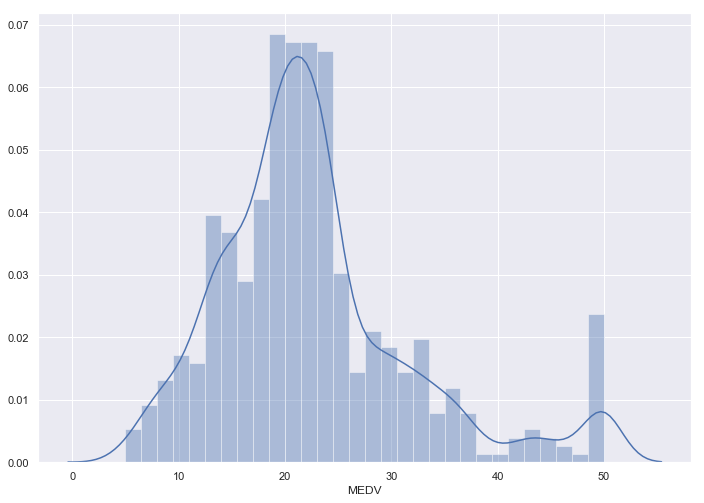

In [21]:
#Plotting distribution of target variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bostondata['MEDV'], bins=30)
plt.show()

We can see from the figure above that MEDV follows a normal distribution with a few outliers.

We will now use a correlation matrix to understand the linear relationship between the variables. We will also use heatmap from the seaborn library to plot the correlation matrix. The heatmap helps us visually, to easily identify important correlation tendencies.

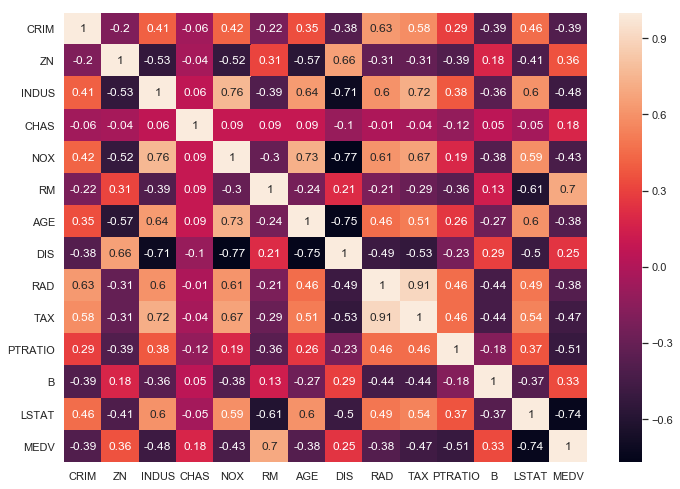

In [55]:
correlation_matrix = bostondata.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)

Correlation value ranges between -1  and 1. Values close to -1 imply negative relationship between the variables and values close to 1 mean positive relationship.

Depending on the level of correlation between the dependent and independent variables, we shall decide which variables to include in the model. Higher correlation means they should be included.

High correlation among the independent variables means presence of multi-collinearity in which case the particular features should not be taken together in the same model.

###### Observations:

1) RM has a high positive correlation with MEDV(0.7) and LSTAT has a high negative correlation with MEDV(-0.74). They should definitely be included in the model.

2) RAD and TAX have a high correlation of 0.91 which means they cannot be included in the same model. NOX and DIS have a correlation of -0.77. DIS and AGE have a correlation of -0.75

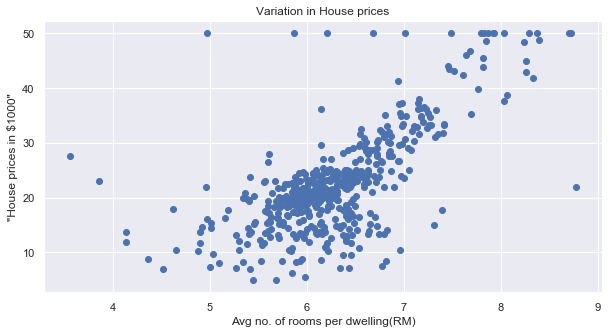

In [33]:
#Scatter Plot for visualisation

#RM with MEDV

import pylab
a = bostondata['RM']
b = bostondata['MEDV']


plt.figure(figsize=(10, 5))
plt.scatter(a,b)
plt.title("Variation in House prices")
plt.xlabel("Avg no. of rooms per dwelling(RM)")
plt.ylabel('"House prices in $1000"')


plt.show()
   

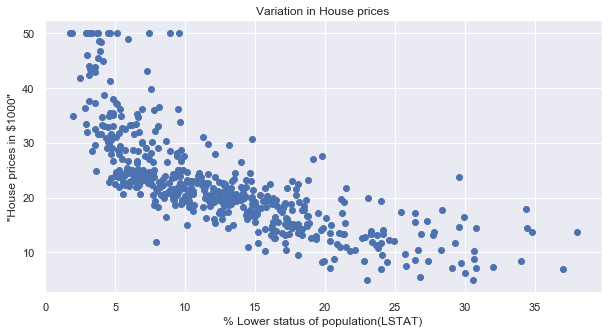

In [35]:
#LSTAT with MEDV

c = bostondata['LSTAT']
b = bostondata['MEDV']


plt.figure(figsize=(10, 5))
plt.scatter(c,b)
plt.title("Variation in House prices")
plt.xlabel("% Lower status of population(LSTAT)")
plt.ylabel('"House prices in $1000"')


plt.show()


###### Observation

1) The number of rooms (RM) has a linear positive relationship with house price. A few outliers are also present.

2) The % of lower status population (LSTAT) is negatively related to the house price, this relation is not exactly linear.

We shall try running 2 models: 

1) MODEL 1: With just RM and LSTAT as the features 

2) MODEL 2: With all the features 

### MODEL 1

###### Data preparation

In [36]:

X = pd.DataFrame(np.c_[bostondata['LSTAT'], bostondata['RM']], columns = ['LSTAT','RM'])
Y = bostondata['MEDV']

###### Splitting into train and test

In [37]:
# splitting in 80:20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


###### Applying Linear Regression model

In [39]:
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

###### Model evaluation

In [40]:
#training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

#testing set

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
R2 score is 0.6628996975186954


### Model 2

##### Data preparation

In [47]:
X = bostondata.drop('MEDV', axis = 1)
y = bostondata['MEDV']

##### Splitting into train and test

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

##### Applying Linear Regression

In [49]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

##### Model evaluation

In [50]:
# Training set

y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Testing set

y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print("The model performance for testing set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75


The model performance for testing set
--------------------------------------
Root Mean Squared Error: 4.928602182665355
R^2: 0.67




Upon comparing the evaluation statistics of the two models, it can be seen that Model 2 is the better model. However, there could be other combinations of features that could be used to possibly improve model performance.

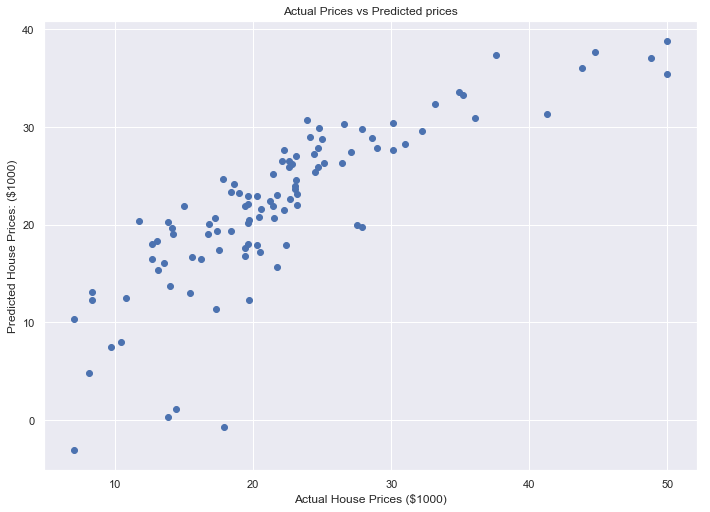

In [54]:
#Actual vs Predicted House prices scatterplot
plt.scatter(Y_test, y_test_predict)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.title("Actual Prices vs Predicted prices")
plt.show()